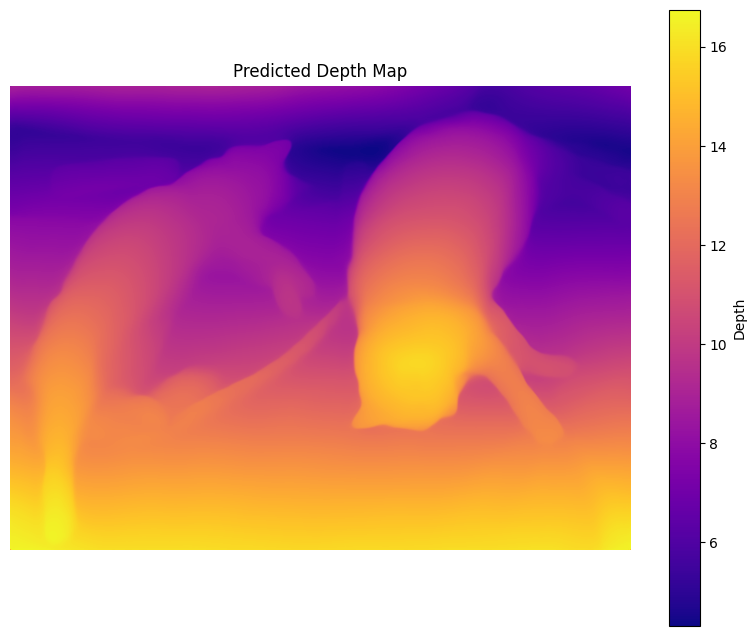

In [2]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
import torch
import numpy as np
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Load the image
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

# Load the model and processor
image_processor = AutoImageProcessor.from_pretrained("LiheYoung/depth-anything-small-hf")
model = AutoModelForDepthEstimation.from_pretrained("LiheYoung/depth-anything-small-hf")

# Prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

# Get the predicted depth
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# Interpolate to the original image size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],  # [height, width]
    mode="bicubic",
    align_corners=False,
)

# Convert the tensor to a NumPy array and remove extra dimensions
depth_map = prediction.squeeze().cpu().numpy()

# Visualize the depth map using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(depth_map, cmap='plasma')  # You can try other colormaps like 'inferno' or 'viridis'
plt.colorbar(label='Depth')
plt.title('Predicted Depth Map')
plt.axis('off')  # Remove axis labels
plt.show()
